In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Data Load
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
plt.figure(figsize=(16,8))
for k in range(32):
    img = mnist.train.images[k].reshape(28,28)
    label = np.argmax(mnist.train.labels[k])
    plt.subplot(4,8,1+k)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.show()

# Train / Test의 loss와 accuracy 구하기

1. `tf.eqaul`, `tf.argmax`, `tf.reduce_mean`을 이용하여 정확도 구하는 함수 구현
1. SGD 구현
1. train batch에서만 계산한 loss 값
1. 전체 train 데이터에서 계산한 loss 값
1. 전체 test 데이터에서 계산한 loss 값

다음 그림과 같이 나오면 잘 구하신겁니다.

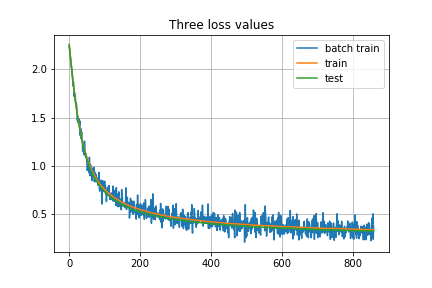

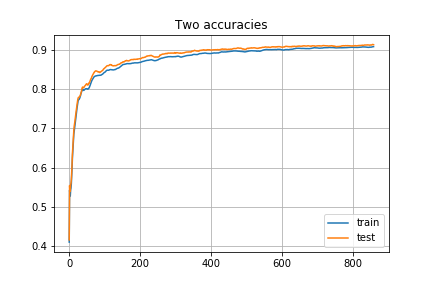


In [ ]:
features = mnist.train.images
labels = mnist.train.labels

x = tf.placeholder(tf.float32, [None, 784], name='FC_image')
y = tf.placeholder(tf.float32, [None, 10], name='FC_label')
    
with tf.name_scope('Fastcampus_Variables'):
    W = tf.Variable(tf.zeros([784, 10]), name='FC_W')
    b = tf.Variable(tf.zeros([10]), name='FC_b')

model = tf.nn.softmax(tf.matmul(x, W) + b)

# TODO 1
correct_prediction = tf.cast(tf.equal(tf.argmax(y,1), tf.argmax(model,1)), tf.float32)
accuracy = tf.reduce_mean(correct_prediction)

loss = tf.reduce_mean(tf.reduce_sum(-y * tf.log(model),1))

In [ ]:
logs_path = './tmp/'

# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", loss)
tf.summary.scalar("Accuracy", accuracy)

# Create a summary to monitor image
tf.summary.image("image", tf.reshape(x[:1], [-1, 28, 28, 1]))

# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

# op to write logs to Tensorboard
batch_train_summary_writer = tf.summary.FileWriter(logs_path + '/train_batch', graph=tf.get_default_graph())
train_summary_writer = tf.summary.FileWriter(logs_path + '/train', graph=tf.get_default_graph())
test_summary_writer = tf.summary.FileWriter(logs_path + '/test', graph=tf.get_default_graph())

In [ ]:
batch_size = 128
MaxEpochs = 2
optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

k = 0
for epoch in range(MaxEpochs):
    for step in range(len(mnist.train.images) // batch_size + 1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # Batch Train
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        
        _, summary = sess.run([loss, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
        batch_train_summary_writer.add_summary(summary, k)
        
        # Train loss and accuracy
        c, summary = sess.run([loss, merged_summary_op],
                                     feed_dict={x: features, y: labels})
        train_summary_writer.add_summary(summary, k)

        # Test loss and accuracy
        _, summary = sess.run([loss, merged_summary_op],
                                     feed_dict={x: mnist.test.images, y: mnist.test.labels})
        test_summary_writer.add_summary(summary, k)
        if step % 100 == 0:
            print(epoch, step, c)
        k += 1
    print("")

터미널에서 다음을 실행한다.
```bash
tensorboard --logdir=tmp
```

그리고 인터넷 브라우저를 통해 [http://localhost:6006/](http://localhost:6006/)로 접속한다.